In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
print('libaries imported!')

libaries imported!


In [2]:
dataset_link = "https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv"
df = pd.read_csv(dataset_link) 
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [4]:
df.duplicated().sum() 

172

In [5]:
df.drop_duplicates(inplace=True) 

In [6]:
df.duplicated().sum() 

0

In [7]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [8]:
df[df['Arrival Delay in Minutes'].isnull()]

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
213,Female,Loyal Customer,Business travel,Eco,satisfied,38,109,5,4,5,31,NaN
1124,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,53,1012,4,4,4,38,NaN
1529,Male,Loyal Customer,Business travel,Business,neutral or dissatisfied,39,733,2,2,3,11,NaN
2004,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied,26,1035,2,4,2,41,NaN
2108,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,24,417,5,2,5,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,49,1249,3,4,3,230,NaN
102384,Male,Loyal Customer,Business travel,Eco,neutral or dissatisfied,58,733,3,2,3,55,NaN
102552,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,29,1107,5,5,5,0,NaN
102960,Male,Loyal Customer,Business travel,Eco,satisfied,58,1088,5,5,5,0,NaN


In [9]:
df["Arrival Delay in Minutes"].isnull().sum()

310

In [10]:
round(df["Arrival Delay in Minutes"].mean(),2)

15.2

In [11]:
df["Arrival Delay in Minutes"].fillna(round(df["Arrival Delay in Minutes"].mean(),2),inplace=True)

C:\Users\Ranjit\AppData\Local\Temp\ipykernel_2672\2824331202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Arrival Delay in Minutes"].fillna(round(df["Arrival Delay in Minutes"].mean(),2),inplace=True)


In [12]:
df.isnull().sum()


Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [13]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

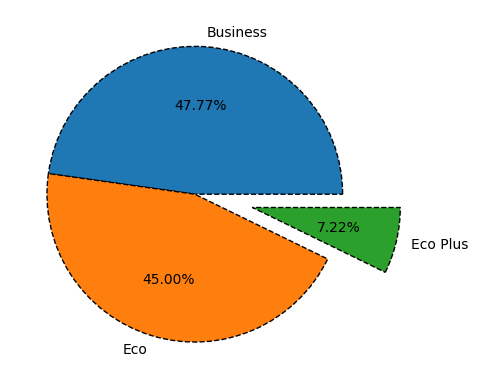

In [14]:
labl = list(df['Class'].value_counts().keys())
valu = list(df['Class'].value_counts().values) 
explosion = [0,0,0.4]

plt.pie(valu,labels=labl,autopct="%1.2f%%",explode=explosion,wedgeprops={'ec':'black','ls':'dashed'}) 
plt.show()

In [15]:
df['Cleanliness'].value_counts()

Cleanliness
4    27123
3    24531
5    22646
2    16116
1    13304
0       12
Name: count, dtype: int64

In [16]:
# sns.countplot(df['Cleanliness']) 

In [17]:
female  = df[df['Gender'] == 'Female']
male    = df[df['Gender'] == 'Male']

In [18]:
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42394
disloyal Customer    10257
Name: count, dtype: int64

In [19]:
male['Customer Type'].value_counts()


Customer Type
Loyal Customer       42384
disloyal Customer     8697
Name: count, dtype: int64

In [20]:
female['Class'].value_counts()

Class
Business    24873
Eco         23836
Eco Plus     3942
Name: count, dtype: int64

In [21]:
male['Class'].value_counts()


Class
Business    24682
Eco         22848
Eco Plus     3551
Name: count, dtype: int64

In [22]:
## onehotencoder representation of features 
df2 = pd.get_dummies(df,drop_first='if_binary').astype(int)

In [23]:
df2.head() 

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1


In [24]:
df2.dtypes

Age                                int32
Flight Distance                    int32
Inflight entertainment             int32
Baggage handling                   int32
Cleanliness                        int32
Departure Delay in Minutes         int32
Arrival Delay in Minutes           int32
Gender_Male                        int32
Customer Type_disloyal Customer    int32
Type of Travel_Personal Travel     int32
Class_Eco                          int32
Class_Eco Plus                     int32
satisfaction_satisfied             int32
dtype: object

In [25]:
# independent variables(x), and dependent variable(y)
x =  df2.drop('satisfaction_satisfied',axis='columns')
y =  df2[['satisfaction_satisfied']]

In [29]:
## train test split  
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [32]:
## importing algorithms 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 

### SVM ==> support vector machine 

In [33]:
lgr = LogisticRegression() 
dtc = DecisionTreeClassifier()
rdfc = RandomForestClassifier()
knn_cls = KNeighborsClassifier() 
print("All classes initiated!")

All classes initiated!


In [35]:
import  warnings 
warnings.filterwarnings('ignore')

In [36]:
## training algorithms 
lgr.fit(x_train,y_train)
dtc.fit(x_train,y_train)
rdfc.fit(x_train,y_train)
knn_cls.fit(x_train,y_train)
print('All algorithms is trained!') 


All algorithms is trained!


In [39]:
## find out score all the algorithms 
print("score of logistic regression")
print("training score : ",lgr.score(x_train,y_train)*100)
print("testing score : ", lgr.score(x_test,y_test)*100)
print()

print("score of Decision tree")
print("training score : ",dtc.score(x_train,y_train)*100)
print("testing score : ", dtc.score(x_test,y_test)*100)
print()

print("score of Random forest")
print("training score : ",rdfc.score(x_train,y_train)*100)
print("testing score : ", rdfc.score(x_test,y_test)*100)
print()

print("score of KNN")
print("training score : ",knn_cls.score(x_train,y_train)*100)
print("testing score : ", knn_cls.score(x_test,y_test)*100)
print()




score of logistic regression
training score :  79.531240585648
testing score :  79.15361257049211

score of Decision tree
training score :  99.97348918479243
testing score :  81.11534197715332

score of Random forest
training score :  99.96987407362776
testing score :  86.8896707957777

score of KNN
training score :  78.8371392420317
testing score :  68.11105220031813



In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# hyperparameter tuning  
rdf2 = RandomForestClassifier(n_estimators=80,min_samples_leaf=15,min_samples_split=25,max_depth=9)

In [42]:
rdf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=15, min_samples_split=25,
                       n_estimators=80)

In [43]:
print("score of Random forest")
print("training score : ",rdf2.score(x_train,y_train)*100)
print("testing score : ", rdf2.score(x_test,y_test)*100)

score of Random forest
training score :  87.89781285774538
testing score :  87.45842772449028


In [44]:
### prediction  



In [45]:
y_test

,satisfaction_satisfied
1665,0
9287,0
66746,0
23793,0
82039,1
...,...
95203,1
38642,1
8827,0
95545,1
